# COSMOS image generation tutorial

## Setup

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

import btk
import btk.plot_utils
import btk.survey
import btk.draw_blends
import btk.catalog
import btk.sampling_functions
import astropy.table

# Here we use a small sample of the real COSMOS catalog ; feel free to fill in the correct path
# if you have the complete catalog on your computer
COSMOS_CATALOG_PATHS = [
    "../data/cosmos/real_galaxy_catalog_23.5_example.fits",
    "../data/cosmos/real_galaxy_catalog_23.5_example_fits.fits",
]


## Drawing blends

We assume that you have already gone over the "intro" tutorial. You will find that generating images with COSMOS is very similar to generating images with Catsim. Let's start with the catalog and sampling function.

In [6]:
stamp_size = 24.0
batch_size = 8
catalog = btk.catalog.CosmosCatalog.from_file(COSMOS_CATALOG_PATHS)
sampling_function = btk.sampling_functions.DefaultSampling(stamp_size=stamp_size)

We can now create the corresponding instance of DrawBlendsGenerator. There is an important caveat here : as in the other tutorial, we use the Rubin survey. However, the COSMOS catalog only contains images from the f814w band ; when using other bands, the image is only rescaled to get the right flux. Moreover, at the time the flux will not be accurate as we do not have the SED for COSMOS galaxies, meaning that we cannot recover the correct magnitude in other bands than f814w ; the flux is thus computed using the magnitude in that band and the survey parameters provided. We are currently working on getting a more realistic flux.

In [11]:
draw_generator = btk.draw_blends.CosmosGenerator(
        catalog,
        sampling_function,
        [btk.survey.Rubin],
        batch_size=batch_size,
        stamp_size=stamp_size,
        cpus=1,
        add_noise=True,
        verbose=False,
        meas_bands=["i"],
    )

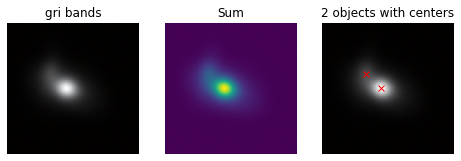

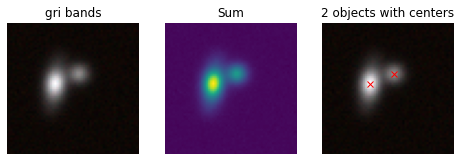

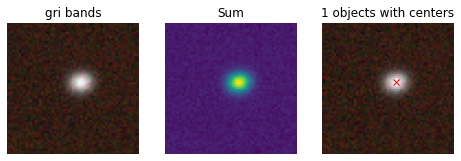

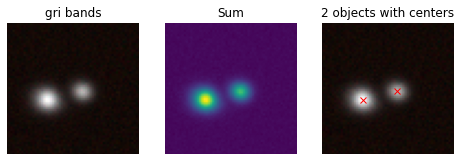

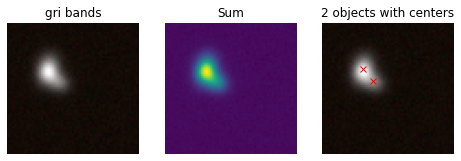

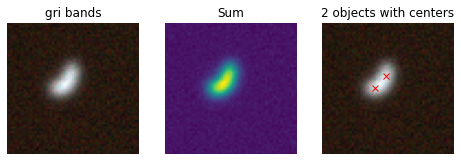

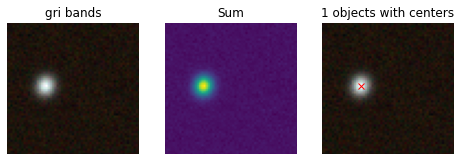

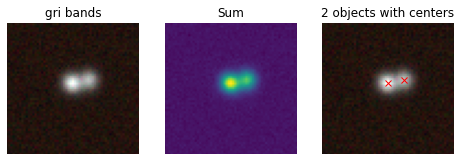

In [12]:
batch = next(draw_generator)
blend_images = batch['blend_images']
blend_list = batch['blend_list']
btk.plot_utils.plot_blends(blend_images, blend_list, limits=(30,90))